# **Praktikum 4 MA2271 - Shift 3**
**3 Maret 2023**

Nama : *Tim Asisten MA2271* \
NIM :



# **Nomor 1**

Diketahui fungsi $f(t)$ memiliki grafik seperti gambar di bawah untuk $0 \leq t \leq 6\pi$.
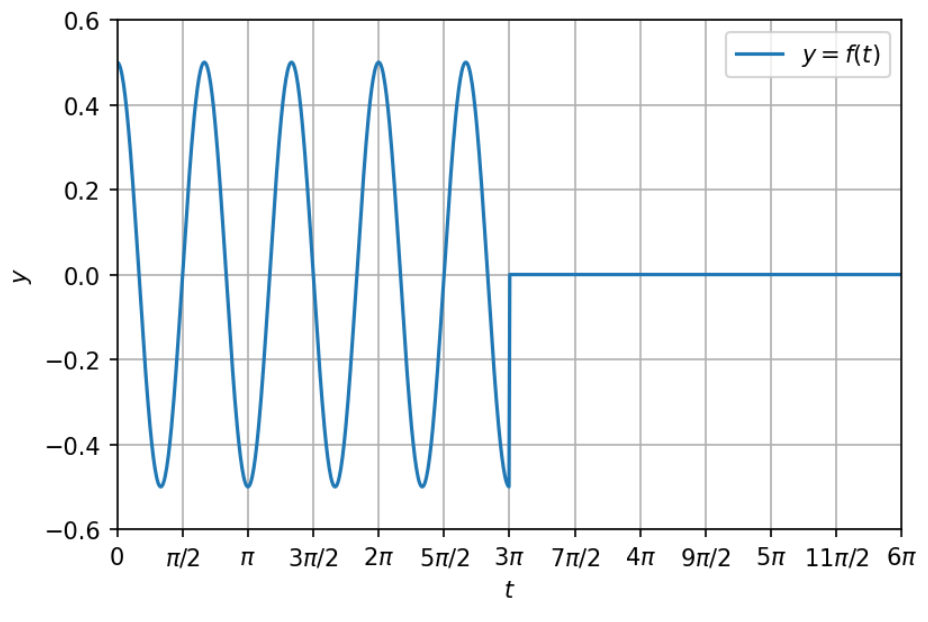

## **Nomor 1A**

Tuliskan fungsi eksplisit dari grafik di atas. Untuk memastikan kebenaran jawaban Anda, gambarkan grafik dari fungsi yang telah Anda tentukan tersebut dan bandingkan dengan grafik pada soal.

**Jawab:**

Perhatikan bahwa grafik pada soal menggambarkan fungsi
$$
f(t) = \begin{cases}
\frac{1}{2}\cos(3t), \quad &t < 3\pi \\
0, \quad &t \geq 3\pi  \text{.}
\end{cases}
$$

Dengan *step function*, fungsi eksplisit yang tepat untuk grafik tersebut adalah
$$
f(t) = \frac{1}{2}\cos(3t) [1-u_{3\pi}(t)] \text{.}
$$

Blok kode di bawah akan menunjukkan bahwa grafik fungsi $f(t)$ yang telah ditentukan tersebut sesuai atau sama dengan grafik yang tertera pada soal.

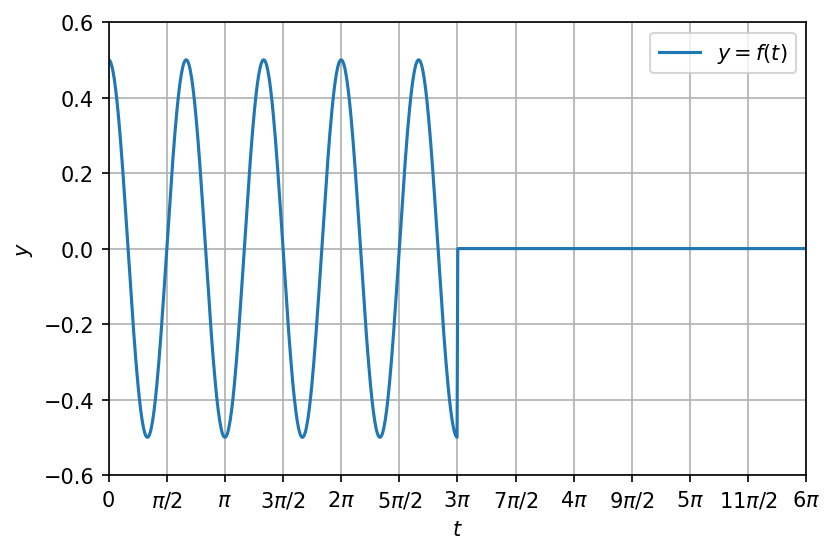

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------

t_1a = np.linspace(0,6*np.pi,1000)
f_num_1a = lambda t: np.cos(3*t)/2 * (1 - np.heaviside(t-3*np.pi, 0.5))
plt.plot(t_1a,f_num_1a(t_1a))
x_labels = ['0', '$\pi/2$', '$\pi$', '$3\pi/2$',  '$2\pi$', '$5\pi/2$', '$3\pi$', '$7\pi/2$', '$4\pi$', '$9\pi/2$', '$5\pi$', '$11\pi/2$', '$6\pi$']
plt.xticks(np.array(np.arange(0, 6.4*np.pi, np.pi/2)),
            x_labels)
plt.xlim([0,6*np.pi])
plt.ylim([-0.6,0.6])
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend(['$y=f(t)$'])
plt.grid('on')
plt.show()

## **Nomor 1B**

Tentukan transformasi Laplace dari fungsi yang telah Anda tentukan pada Nomor 1A.

In [ ]:
from sympy.integrals.transforms import laplace_transform
from sympy import symbols
from sympy import *
t = symbols('t', positive = True)
s = symbols('s', real = True)
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------

f_1b = cos(3*t)/2 * (1 - Heaviside(t-3*pi))

laplace_transform(f_1b,t,s)

(s/(2*(s**2 + 9)) - LaplaceTransform(cos(3*t)*Heaviside(t - 3*pi), t, s)/2,
 -oo,
 s > 0)

Berdasarkan jawaban di atas, sympy tidak bisa menghitung transformasi Laplace dari $\frac{1}{2}\cos(3t) u_{3\pi}(t)$ sehingga kita akan menggunakan teorema untuk menghitungnya. Tulis $f(t)$ sebagai

\begin{align*}
f(t) &= \frac{1}{2}\cos(3t) [1-u_{3\pi}(t)] \\
&= \frac{1}{2}\cos(3t) - \frac{1}{2} \cos(3t) u(t-3\pi)
\end{align*}

Kita ingin membuat $\cos(3t)$ menjadi suatu fungsi dalam $(t-3\pi)$. Perhatikan bahwa
$$
\cos(3t) = \cos(3(t-3\pi)+9\pi)
$$
Jika kita misalkan $g(t) = \cos(3t+9\pi) = -\cos(3t)$, maka
$$
\cos(3t) = g(t-3\pi)
$$

Akibatnya dengan teorema bisa diperoleh
\begin{align*}
\mathcal{L}\{f(t)\} &= \mathcal{L}\Big\{\frac{1}{2}\cos(3t)\Big\} - \mathcal{L}\Big\{\frac{1}{2} \cos(3t) u(t-3\pi)\Big\} \\
&= \mathcal{L}\Big\{\frac{1}{2}\cos(3t)\Big\} - \mathcal{L}\Big\{\frac{1}{2} g(t-3\pi) u(t-3\pi)\Big\} \\
&= \mathcal{L}\Big\{\frac{1}{2}\cos(3t)\Big\} - e^{-3\pi s} \mathcal{L}\Big\{\frac{1}{2} g(t)\Big\} \\
&= \mathcal{L}\Big\{\frac{1}{2}\cos(3t)\Big\} + e^{-3\pi s} \mathcal{L}\Big\{\frac{1}{2} cos(3t)\Big\}
\end{align*}

In [ ]:
# Transformasi Laplace dari f(t)
g_1b = cos(3*t)/2
G_1b = laplace_transform(g_1b, t,s, noconds='True')
F_1b = G_1b + exp(-3*pi*s)*G_1b
print('Transformasi Laplace dari f(t):')
F_1b


Transformasi Laplace dari f(t):


s/(2*(s**2 + 9)) + s*exp(-3*pi*s)/(2*(s**2 + 9))

## **Nomor 1C**

Tentukan invers transformasi Laplace dari jawaban yang telah Anda peroleh pada Nomor 1B. Apakah hasilnya sama dengan fungsi yang Anda tetapkan pada Nomor 1A?

In [ ]:
from sympy.integrals.transforms import inverse_laplace_transform
from sympy import symbols
from sympy import *
t = symbols('t', positive = True)
s = symbols('s', real = True)
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------

f_1c = inverse_laplace_transform(F_1b,s,t)
print('Invers transformasi Laplace dari jawaban Nomor 1B:')
f_1c

Invers transformasi Laplace dari jawaban Nomor 1B:


-(Heaviside(t - 3*pi) - 1)*cos(3*t)/2

Hasilnya sama dengan fungsi yang ditentukan pada nomor 1A sehingga perhitungan ini selalu konsisten.

# **Nomor 2**

Perhatikan sistem pegas-massa-redaman

$$
mx'' + cx' + kx = f(t)
$$

dengan $x$ menyatakan simpangan pegas, $m$ menyatakan massa benda, $c$ menyatakan koefisien redaman, dan $k$ menyatakan konstanta pegas. \\

Misalkan diketahui suatu pegas bermassa $m = 1$ dengan konstanta $k = 1$ yang tidak memiliki redaman diberikan gaya luar $f(t)$ yang merupakan fungsi yang Anda peroleh pada Nomor 1. Pegas ini tidak memiliki simpangan di awal karena dalam keadaan diam saat $t = 0$.

## **Nomor 2A**

Tentukan solusi dari persamaan diferensial di atas dengan memanfaatkan transformasi Laplace.

In [ ]:
 from sympy.integrals.transforms import laplace_transform
from sympy.integrals.transforms import inverse_laplace_transform
from sympy import symbols
from sympy import *

x, f, X = symbols('x f X', cls = Function)
t = symbols('t', positive = True)
s = symbols('s', real = True)
# Ketik jawaban Anda di bawah garis.
# -----------------------------------------------------------------------

m = 1
c = 0
k = 1
x0 = 0
v0 = 0

# Transformasi Laplace dari pers. diferensial
L_DE = Eq(m*((s**2)*X(s)-s*x0-v0) + c*(s*X(s)-x0) + k*X(s), F_1b)

# Transformasi Laplace dari solusi PD
sol_Xs = solve(L_DE, X(s))

# Solusi PD
sol_DE = inverse_laplace_transform(sol_Xs[0], s, t)
sol_DE = expand(sol_DE)
print('Solusi persamaan diferensial:')
sol_DE

Solusi persamaan diferensial:


exp(3*I*t)*Heaviside(t - 3*pi)/32 - exp(3*I*t)/32 - exp(I*t)*Heaviside(t - 3*pi)/32 + exp(I*t)/32 - exp(-I*t)*Heaviside(t - 3*pi)/32 + exp(-I*t)/32 + exp(-3*I*t)*Heaviside(t - 3*pi)/32 - exp(-3*I*t)/32

## **Nomor 2B**

Gambarkan kurva solusi dari permasalahan sistem ini untuk $0 \leq t \leq 6\pi$.

**Hint** : Tambahkan keterangan `modules=modules` pada perintah `lambdify`.
Contoh : `lambdify(t, solusi(t), modules=modules)`

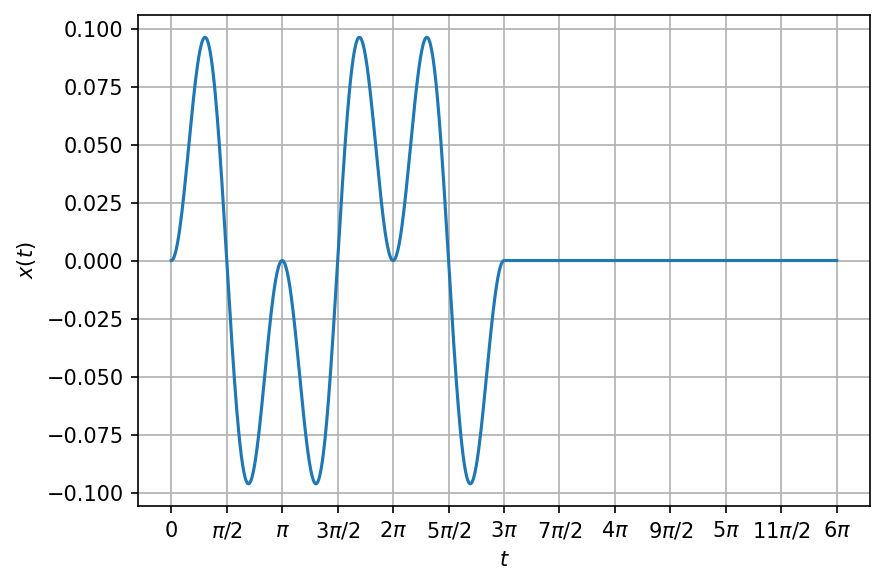

In [ ]:
from sympy import *
from sympy.abc import t
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
modules = [{'Heaviside': lambda x: np.heaviside(x, 0.5)}, 'numpy']
# Ketik jawaban Anda di bawah garis.
# -----------------------------------------------------------------------

# Tanpa lambdify
# sol_DE_num = lambda t: (np.cos(3*t)*np.heaviside(t-3*np.pi, 0.5) - np.cos(3*t) + np.cos(t) -
#                         np.cos(t)*np.heaviside(t-3*np.pi, 0.5)  )/16

sol_DE_num = lambdify(t, sol_DE, modules=modules)

t_2b = np.linspace(0, 6*np.pi, 1000)
plt.plot(t_2b, sol_DE_num(t_2b))
x_labels = ['0', '$\pi/2$', '$\pi$', '$3\pi/2$',  '$2\pi$', '$5\pi/2$', '$3\pi$', '$7\pi/2$', '$4\pi$', '$9\pi/2$', '$5\pi$', '$11\pi/2$', '$6\pi$']
plt.xticks(np.array(np.arange(0, 6.4*np.pi, np.pi/2)),
            x_labels)
plt.grid('on')
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.tight_layout()
plt.show()

## **Nomor 2C**

Berikan interpretasi dari solusi yang Anda peroleh.

**Jawab:**

Gaya $f(t)$ diberikan sejak $t = 0$ sehingga pegas memberikan respons berupa terjadinya osilasi pada simpangan pegas. Namun, mulai $t = 3\pi$, gaya luar ini dihilangkan dan mengakibatkan sistem tidak lagi memberikan respons osilasi. Dengan demikian, simpangan pegas akan konstan pada nilai $x(t) = 0.11$ saat $t$ membesar.

## **Nomor 2D (Bonus)**

Gambarkan kurva solusi dari nomor 2A tanpa menggunakan perintah `lambdify`.

**Hint** : Untuk setiap bilangan kompleks $z\in \mathbb{C}$, berlaku $z+\overline{z}=2\text{Re}(z)$.

Contoh : Misalkan $z(t) = e^{2it} = \cos(2t) + i\sin(2t)$, maka didapatkan bahwa
\begin{equation*}
z(t) + \overline{z(t)} = 2\text{Re}(z(t)) = 2\cos(2t)
\end{equation*}

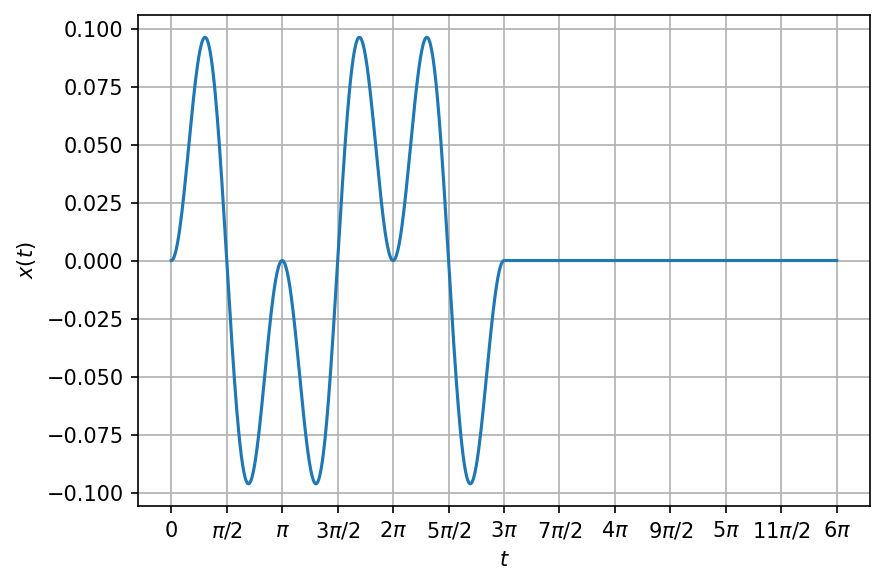

In [ ]:
from sympy import *
from sympy.abc import t
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
# Ketik jawaban Anda di bawah garis.
# -----------------------------------------------------------------------

# Tanpa lambdify
sol_DE_num = lambda t: (np.cos(3*t)*np.heaviside(t-3*np.pi, 0.5) - np.cos(3*t) + np.cos(t) -
                        np.cos(t)*np.heaviside(t-3*np.pi, 0.5))/16

t_2b = np.linspace(0, 6*np.pi, 1000)
plt.plot(t_2b, sol_DE_num(t_2b))
x_labels = ['0', '$\pi/2$', '$\pi$', '$3\pi/2$',  '$2\pi$', '$5\pi/2$', '$3\pi$', '$7\pi/2$', '$4\pi$', '$9\pi/2$', '$5\pi$', '$11\pi/2$', '$6\pi$']
plt.xticks(np.array(np.arange(0, 6.4*np.pi, np.pi/2)),
            x_labels)
plt.grid('on')
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.tight_layout()
plt.show()